<a href="https://colab.research.google.com/github/rezaafsharniakan/NLP_DEEP/blob/main/Classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
  [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[10]

array([0., 1., 0., ..., 0., 0., 0.])

In [13]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [15]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [19]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
  ])

In [22]:
model.compile(optimizer="rmsprop",
  loss="categorical_crossentropy",
  metrics=["accuracy"])

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [24]:
history = model.fit(partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 92ms/step - loss: 2.7231 - accuracy: 0.4717 - val_loss: 1.8659 - val_accuracy: 0.6030
Epoch 2/20
16/16 [==============================] - 1s 69ms/step - loss: 1.5506 - accuracy: 0.6681 - val_loss: 1.3871 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 1s 58ms/step - loss: 1.1779 - accuracy: 0.7453 - val_loss: 1.1829 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 69ms/step - loss: 0.9619 - accuracy: 0.7915 - val_loss: 1.0662 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 1s 66ms/step - loss: 0.8001 - accuracy: 0.8225 - val_loss: 1.0081 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 2s 100ms/step - loss: 0.6717 - accuracy: 0.8542 - val_loss: 0.9673 - val_accuracy: 0.7810
Epoch 7/20
16/16 [==============================] - 2s 105ms/step - loss: 0.5702 - accuracy: 0.8777 - val_loss: 0.9253 - val_accuracy: 0.7950
Epoch 8/20


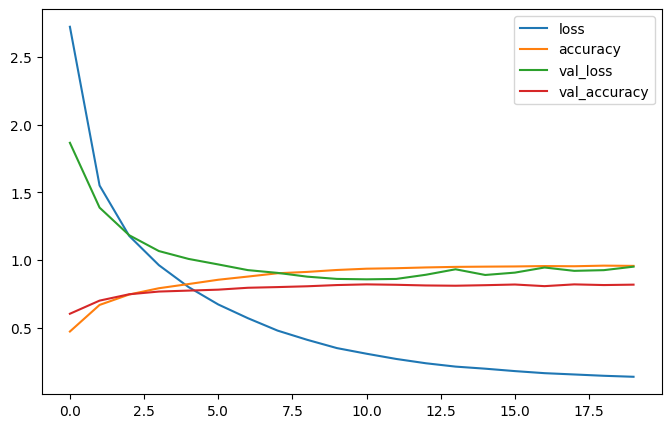

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))

plt.show()

In [27]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.0242 - accuracy: 0.7965


In [28]:
results

[1.024170160293579, 0.7965271472930908]

In [29]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [30]:
predictions[10]

array([6.93701790e-04, 8.67278278e-01, 4.67701349e-03, 3.77401477e-03,
       1.42288557e-03, 8.61476362e-02, 5.04322998e-05, 1.86356774e-05,
       4.15571776e-05, 8.43742455e-05, 1.53359435e-02, 3.06406473e-05,
       8.67804047e-04, 2.46211683e-04, 1.43659278e-03, 2.12569931e-03,
       1.08128870e-05, 1.44085658e-04, 2.35470561e-05, 7.97950706e-05,
       4.06574458e-04, 6.01367128e-06, 2.10676086e-03, 1.24591729e-03,
       4.54851612e-03, 2.17864523e-03, 5.50711957e-06, 1.63255399e-03,
       5.69683965e-04, 1.00270307e-04, 7.01112585e-05, 1.18602584e-04,
       6.34442607e-04, 4.45728656e-05, 3.36327575e-05, 2.04215848e-05,
       7.11824177e-05, 1.24296217e-04, 4.54138586e-04, 1.14620882e-04,
       9.65190848e-05, 1.65764959e-05, 5.80414082e-04, 7.01873148e-07,
       1.19793091e-04, 2.09817183e-04], dtype=float32)

In [31]:
np.sum(predictions[10])

1.0

In [32]:
np.argmax(predictions[10])

1

In [33]:
y_test[10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
test_labels[10]

5

In [40]:
model2 = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(32, activation="relu"),

  layers.Dense(46, activation="softmax")
  ])
model2.compile(optimizer="rmsprop",
  loss="categorical_crossentropy",
  metrics=["accuracy"])
history2 = model.fit(partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 2s 123ms/step - loss: 0.0899 - accuracy: 0.9605 - val_loss: 1.2095 - val_accuracy: 0.7990
Epoch 2/20
16/16 [==============================] - 1s 68ms/step - loss: 0.0890 - accuracy: 0.9588 - val_loss: 1.0995 - val_accuracy: 0.8160
Epoch 3/20
16/16 [==============================] - 1s 72ms/step - loss: 0.0889 - accuracy: 0.9610 - val_loss: 1.1024 - val_accuracy: 0.8060
Epoch 4/20
16/16 [==============================] - 1s 70ms/step - loss: 0.0909 - accuracy: 0.9568 - val_loss: 1.1399 - val_accuracy: 0.8020
Epoch 5/20
16/16 [==============================] - 1s 71ms/step - loss: 0.0913 - accuracy: 0.9589 - val_loss: 1.1431 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 71ms/step - loss: 0.0895 - accuracy: 0.9597 - val_loss: 1.1076 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 0.0900 - accuracy: 0.9593 - val_loss: 1.1191 - val_accuracy: 0.8040
Epoch 8/20
1

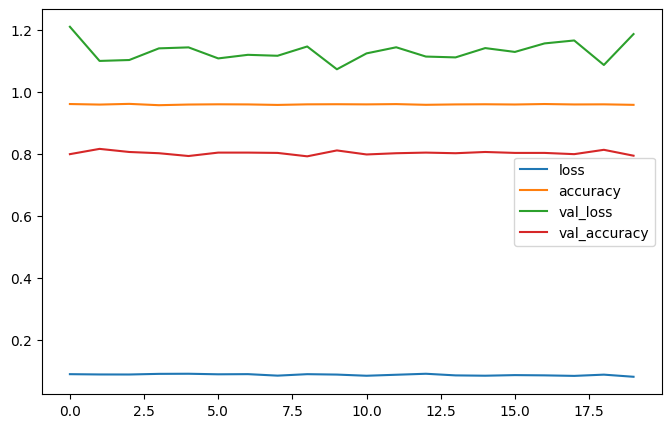

In [41]:
pd.DataFrame(history2.history).plot(figsize=(8,5))

plt.show()